#Import Library

In [ ]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset

In [ ]:
#export database yang akan diolah
data ='/content/drive/MyDrive/dataset/property_in_KL.csv'

##Find size dataset

In [ ]:
#load database dan menunukkan dimensi datanya
df=pd.read_csv(data)
df.shape

(53883, 8)

In [ ]:
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


#EDA

In [ ]:
#exclude word 'Kuala Lumpur' on Location
df.Location=df.Location.str.split(',', expand=True)[0]

#Exclude RM on Price
df.Price=df.Price.str.replace(r'\D', '', regex=True)
#show numerica only include unit
df.Size=df.Size.str.split(':', expand=True)[1]
df.Size=df.Size.str.strip('sq. ft.')

In [ ]:
#drop rows have null values more than 4
th = 4
null_count = df.isna().sum(axis=1)
drop_rows = null_count[null_count >= th].index
df= df.drop(index=drop_rows)

In [ ]:
#rename kolom 'Size' dan 'Location'
df.rename(columns={'Size': 'Size_sqft','Location': 'Location_KL','Price':'Price(RM)' }, inplace=True)

In [ ]:
df_c=df.copy()

In [ ]:
df_c.isna().sum()

Location_KL          0
Price(RM)          197
Rooms              643
Bathrooms          944
Car Parks        16499
Property Type        0
Size_sqft          965
Furnishing        5873
dtype: int64

In [ ]:
df_c['Size_sqft'] = df_c['Size_sqft'].str.replace(',', '')

In [ ]:
def to_float(x):
  try :
    float(x)
  except :
    return False
  return True

In [ ]:
df_c[~df_c['Rooms'].apply(to_float)]

,Location_KL,Price(RM),Rooms,Bathrooms,Car Parks,Property Type,Size_sqft,Furnishing
0,KLCC,1250000,2+1,3.0,2.0,Serviced Residence,1335,Fully Furnished
4,Bukit Jalil,900000,4+1,3.0,2.0,Condominium (Corner),1513,Partly Furnished
5,Taman Tun Dr Ismail,5350000,4+2,5.0,4.0,Bungalow,7200,Partly Furnished
8,Taman Tun Dr Ismail,1950000,4+1,4.0,3.0,2-sty Terrace/Link House (EndLot),25x75,Partly Furnished
12,Taman Tun Dr Ismail,1700000,3+1,3.0,NaN,2-sty Terrace/Link House (Intermediate),1900,Partly Furnished
...,...,...,...,...,...,...,...,...
53872,Sri Hartamas,3150000,4+1,5.0,NaN,Condominium (Duplex),3466,Fully Furnished
53876,Sri Hartamas,2700000,4+2,6.0,3.0,Condominium (Corner),3973,Partly Furnished
53877,Mont Kiara,6500000,5+1,6.0,NaN,Bungalow (Corner),6500,Partly Furnished
53878,Bangsar,5100000,5+1,4.0,NaN,Bungalow (Corner),7168,Fully Furnished


In [ ]:
def converter(x):
    if isinstance(x, str):
        x = x.strip()
        x = x.lower()
        x = x.rstrip('+')
        tokens = x.split('x')
        if len(tokens) == 2:
            try:
                return float(tokens[0]) * float(tokens[1])
            except ValueError:
                return None
        tokens = x.split('+')
        if len(tokens) == 2:
            try:
                return float(tokens[0]) + float(tokens[1])
            except ValueError:
                return x
        tokens = x.split('~')
        if len(tokens) == 2:
            try:
                return (float(tokens[0]) + float(tokens[1]))/2
            except ValueError:
                return x
        tokens = x.split('-')
        if len(tokens) == 2:
            try:
                return (float(tokens[0]) + float(tokens[1]))/2
            except ValueError:
                return x
        if 'acre' in x :
          x=x.strip('acre')
          try :
            return float(x)*43560
          except :
            return x
        if 'sq. m' in x :
          x=x.strip('sq. m')
          try :
            return round(float(x)*10.7639,2)
          except :
            return x
        if '*' in x :
          x=x.split('*')
          try :
            return float(x[0])*float(x[1])
          except :
            return x
        try:
            return float(x)
        except ValueError:
            return x
    elif isinstance(x, (int, float)):
        return float(x)
    else:
        return x

In [ ]:
df_c[['Rooms','Size_sqft']]=df_c[['Rooms','Size_sqft']].applymap(converter)

In [ ]:
drop_index=df_c[~df_c['Size_sqft'].apply(to_float)].index

In [ ]:
df_c=df_c.drop(index=drop_index)

In [ ]:
df_c['Size_sqft']=df_c['Size_sqft'].fillna(df_c['Size_sqft'].mean())

In [ ]:
df_c=df_c.dropna(subset=['Price(RM)'])   #drop row contains NaN in columns Price

In [ ]:
df_c.isna().sum()

Location_KL          0
Price(RM)            0
Rooms              641
Bathrooms          943
Car Parks        16343
Property Type        0
Size_sqft            0
Furnishing        5833
dtype: int64

In [ ]:
df_c['Location_KL']=df_c['Location_KL'].apply(lambda x: x.strip())

In [ ]:
#melakukan grouping untuk melihat sebaran setiap lokasi
df_c_stats=df_c.groupby('Location_KL')['Location_KL'].agg('count').sort_values(ascending=False)
df_c_stats

Location_KL
Mont Kiara                           5770
KLCC                                 5192
Cheras                               4392
Jalan Klang Lama (Old Klang Road)    2810
Setapak                              2666
                                     ... 
TAMAN MELATI                            1
Kemensah                                1
Jalan U-Thant                           1
Taman Ibukota                           1
taman connaught                         1
Name: Location_KL, Length: 107, dtype: int64

In [ ]:
#membuat kelompk lain yang lokasinya kurang atau sama dengan 100
loc_less_than_100=df_c_stats[df_c_stats<=100]

In [ ]:
#mengganti nama  lokasi menjadi 'Other' jika jumlahnya kurang atau sama dengan 100
df_c['Location_KL']=df['Location_KL'].apply(lambda x: 'Other' if x in loc_less_than_100 else x )

In [ ]:
df_c.groupby('Location_KL')['Location_KL'].agg('count').sort_values(ascending=False)

Location_KL
Mont Kiara                           5770
KLCC                                 5192
Cheras                               4392
Jalan Klang Lama (Old Klang Road)    2810
Setapak                              2666
Bukit Jalil                          2538
Kepong                               2233
Bangsar                              1840
Desa ParkCity                        1501
Damansara Heights                    1301
Dutamas                              1232
Ampang                               1191
Sentul                               1120
Sungai Besi                          1104
Taman Tun Dr Ismail                  1061
Sri Hartamas                         1031
Taman Desa                           1005
Wangsa Maju                           958
Segambut                              880
Bukit Bintang                         842
Kuchai Lama                           760
KL City                               755
Sri Petaling                          711
Jalan Kuching         

In [ ]:
#dengan demikian lokasi sekarang memiliki 52 kategori
len(df_c.groupby('Location_KL')['Location_KL'].agg('count').sort_values(ascending=False))

50

In [ ]:
#asumsi bahwa 'Car parks tidak terlalu perpengaruh terhadap harga suatu properti, oleh karena itu, 'Car Parks' diexclude dalam analisis

df_c=df_c.drop('Car Parks', axis=1)

In [ ]:
df_c

,Location_KL,Price(RM),Rooms,Bathrooms,Property Type,Size_sqft,Furnishing
0,KLCC,1250000,3.0,3.0,Serviced Residence,1335.0,Fully Furnished
1,Damansara Heights,6800000,6.0,7.0,Bungalow,6900.0,Partly Furnished
2,Dutamas,1030000,3.0,4.0,Condominium (Corner),1875.0,Partly Furnished
4,Bukit Jalil,900000,5.0,3.0,Condominium (Corner),1513.0,Partly Furnished
5,Taman Tun Dr Ismail,5350000,6.0,5.0,Bungalow,7200.0,Partly Furnished
...,...,...,...,...,...,...,...
53878,Bangsar,5100000,6.0,4.0,Bungalow (Corner),7168.0,Fully Furnished
53879,Bangsar,5000000,5.0,4.0,Bungalow (Intermediate),15000.0,Unfurnished
53880,Bangsar,5500000,6.0,4.0,Bungalow (Intermediate),7168.0,Partly Furnished
53881,Wangsa Maju,480000,3.0,2.0,Condominium (Intermediate),1150.0,Unfurnished


In [ ]:
df_c.isna().sum()

Location_KL         0
Price(RM)           0
Rooms             641
Bathrooms         943
Property Type       0
Size_sqft           0
Furnishing       5833
dtype: int64

In [ ]:
df_c.groupby('Furnishing')['Furnishing'].agg('count').sort_values(ascending=False)

Furnishing
Partly Furnished    26414
Fully Furnished     13889
Unfurnished          5699
Unknown               588
Name: Furnishing, dtype: int64

In [ ]:
#ubah tipe data dari object to float
df_c[['Price(RM)','Size_sqft']]=df_c[['Price(RM)','Size_sqft']].astype(float)

In [ ]:
#buat kolom baru yang berisi harga per satuan luas
df_c['Price_per_square']=round(df_c['Price(RM)']/df_c['Size_sqft'],2)

In [ ]:
df_c

,Location_KL,Price(RM),Rooms,Bathrooms,Property Type,Size_sqft,Furnishing,Price_per_square
0,KLCC,1250000.0,3.0,3.0,Serviced Residence,1335.0,Fully Furnished,936.33
1,Damansara Heights,6800000.0,6.0,7.0,Bungalow,6900.0,Partly Furnished,985.51
2,Dutamas,1030000.0,3.0,4.0,Condominium (Corner),1875.0,Partly Furnished,549.33
4,Bukit Jalil,900000.0,5.0,3.0,Condominium (Corner),1513.0,Partly Furnished,594.84
5,Taman Tun Dr Ismail,5350000.0,6.0,5.0,Bungalow,7200.0,Partly Furnished,743.06
...,...,...,...,...,...,...,...,...
53878,Bangsar,5100000.0,6.0,4.0,Bungalow (Corner),7168.0,Fully Furnished,711.50
53879,Bangsar,5000000.0,5.0,4.0,Bungalow (Intermediate),15000.0,Unfurnished,333.33
53880,Bangsar,5500000.0,6.0,4.0,Bungalow (Intermediate),7168.0,Partly Furnished,767.30
53881,Wangsa Maju,480000.0,3.0,2.0,Condominium (Intermediate),1150.0,Unfurnished,417.39


In [ ]:
df_c.isna().sum()

Location_KL            0
Price(RM)              0
Rooms                641
Bathrooms            943
Property Type          0
Size_sqft              0
Furnishing          5833
Price_per_square       0
dtype: int64

In [ ]:
#jumlah null value pada kolom Bathroom dan Rooms, hanya 1,8%, maka untuk menhadlenya, cukup dengan drop
for i in ['Bathrooms','Rooms']:
  null= round(df_c[i].isna().sum()/len(df_c)*100,2)
  print(null)

1.8
1.22


In [ ]:
df_c.dropna(subset=['Bathrooms', 'Rooms'], how='any', inplace=True)

In [ ]:
df_c.isna().sum()

Location_KL            0
Price(RM)              0
Rooms                  0
Bathrooms              0
Property Type          0
Size_sqft              0
Furnishing          5633
Price_per_square       0
dtype: int64

In [ ]:
df_c.shape

(51376, 8)

In [ ]:
df_c[~(df_c['Price_per_square']/df_c['Bathrooms']<300)]

,Location_KL,Price(RM),Rooms,Bathrooms,Property Type,Size_sqft,Furnishing,Price_per_square
0,KLCC,1250000.0,3.0,3.0,Serviced Residence,1335.0,Fully Furnished,936.33
11,Taman Tun Dr Ismail,1680000.0,4.0,3.0,2-sty Terrace/Link House (Intermediate),1760.0,Partly Furnished,954.55
21,Damansara Heights,1550000.0,1.0,1.0,Serviced Residence (Intermediate),904.0,Fully Furnished,1714.60
24,Bangsar South,490000.0,1.0,1.0,Serviced Residence,520.0,Fully Furnished,942.31
32,Kepong,560000.0,3.0,2.0,2-sty Terrace/Link House (Intermediate),880.0,Partly Furnished,636.36
...,...,...,...,...,...,...,...,...
53844,Sri Hartamas,430000.0,studio,1.0,Serviced Residence (Corner),500.0,Fully Furnished,860.00
53860,Ampang,490000.0,1.0,1.0,Serviced Residence,705.0,Partly Furnished,695.04
53862,Seputeh,750000.0,3.0,2.0,Condominium,915.0,Partly Furnished,819.67
53868,KL Sentral,1400000.0,4.0,3.0,Condominium (Corner),1544.0,Fully Furnished,906.74


In [ ]:
#convert studio to 2 and
df_c['Rooms']=df_c['Rooms'].apply(lambda x: 2 if x == 'studio' else (int(x.split(' ')[0])
              if isinstance(x, str) and ' ' in x else x))

In [ ]:
df_c['Rooms']=df_c['Rooms'].astype(int)
df_c['Bathrooms']=df_c['Bathrooms'].astype(int)

In [ ]:
for i in df_c.columns :
  uniq=df_c[i].unique()
  print(i, uniq)
  print(40*'==')

Location_KL ['KLCC' 'Damansara Heights' 'Dutamas' 'Bukit Jalil' 'Taman Tun Dr Ismail'
 'Sri Petaling' 'Bukit Tunku (Kenny Hills)' 'Mont Kiara' 'Desa ParkCity'
 'Bangsar South' 'Ampang Hilir' 'Kepong'
 'Jalan Klang Lama (Old Klang Road)' 'Sungai Besi' 'KL City' 'KL Sentral'
 'Taman Melawati' 'Setapak' 'City Centre' 'Country Heights Damansara'
 'Taman Desa' 'Sentul' 'Bangsar' 'Segambut' 'Batu Caves' 'Wangsa Maju'
 'Ampang' 'Sri Hartamas' 'Other' 'Cheras' 'Setiawangsa' 'OUG'
 'Bukit Bintang' 'Jalan Sultan Ismail' 'Jalan Kuching' 'Bandar Menjalara'
 'Seputeh' 'Sunway SPK' 'KL Eco City' 'Pantai' 'Kuchai Lama' 'Jalan Ipoh'
 'Brickfields' 'Desa Pandan' 'Desa Petaling' 'Pandan Perdana'
 'Bandar Damai Perdana' 'Keramat' 'Salak Selatan' 'Titiwangsa']
Price(RM) [1250000. 6800000. 1030000. ... 1888880.  736200.  642800.]
Rooms [ 3  6  5  4  7  1  2  8 14 12  9 13 20 10 11 15 18 16]
Bathrooms [ 3  7  4  5  2  6  1  9  8 16 12 11 13 20 10 14 15]
Property Type ['Serviced Residence' 'Bungalow' 'Condom

In [ ]:
min(df_c['Size_sqft']/df_c['Rooms'])

0.0

In [ ]:
df_c['Price_per_square'].describe().round(2)

count    51376.00
mean          inf
std           NaN
min          0.01
25%        472.73
50%        659.09
75%        917.43
max           inf
Name: Price_per_square, dtype: float64

In [ ]:
df_c = df_c.drop(df_c[df_c['Size_sqft'] < 10].index)

In [ ]:
#asumsi bahwa luas ruangan rata-rata adalah 71.04, maka perlu diexclude bagunan yang memiliki luas dibawah 71.04
df_c =df_c.drop(df_c[df_c['Size_sqft']/df_c['Rooms']<71.04].index)

In [ ]:
#excude data yang memiliki harga per square dibahwa 20
df_c=df_c.drop(df_c[df_c['Price_per_square']<20].index)

In [ ]:
#remove oulier
def remove_outlier(df_c):
  df_out=pd.DataFrame()
  for key, subdf in df_c.groupby('Location_KL'):
    m   =np.mean(subdf.Price_per_square)
    std =np.std(subdf.Price_per_square)
    reduced_df= subdf[(subdf.Price_per_square>(m-std))& (subdf.Price_per_square<=(m+std))]
    df_out=pd.concat([df_out, reduced_df], ignore_index=True)
  return df_out

In [ ]:
dff=remove_outlier(df_c)

In [ ]:
dff.shape

(41849, 8)

In [ ]:
dff['Price_per_square'].describe().round(2)

count    41849.00
mean       736.87
std        340.22
min         21.58
25%        487.06
50%        650.00
75%        894.74
max       8294.93
Name: Price_per_square, dtype: float64

In [ ]:
dff

,Location_KL,Price(RM),Rooms,Bathrooms,Property Type,Size_sqft,Furnishing,Price_per_square
0,Ampang,3680000.0,7,8,Bungalow (Corner),6300.0,Unfurnished,584.13
1,Ampang,3600000.0,5,4,Bungalow (Intermediate),9670.0,Unfurnished,372.29
2,Ampang,2590000.0,6,6,Bungalow (Intermediate),4640.0,Partly Furnished,558.19
3,Ampang,1480000.0,4,4,Condominium (Intermediate),1876.0,Fully Furnished,788.91
4,Ampang,710550.0,4,2,Serviced Residence (Corner),1572.0,Partly Furnished,452.00
...,...,...,...,...,...,...,...,...
41844,Wangsa Maju,480000.0,3,2,Condominium,1150.0,Unfurnished,417.39
41845,Wangsa Maju,485000.0,3,2,Condominium,1150.0,Unfurnished,421.74
41846,Wangsa Maju,490000.0,3,2,Condominium,1150.0,Unfurnished,426.09
41847,Wangsa Maju,1300000.0,6,4,3-sty Terrace/Link House (Intermediate),2040.0,Partly Furnished,637.25


In [ ]:
dff[dff['Price_per_square']>2000]

,Location_KL,Price(RM),Rooms,Bathrooms,Property Type,Size_sqft,Furnishing,Price_per_square
5209,Bukit Jalil,7200000.0,2,2,Serviced Residence (Corner),868.0,Partly Furnished,8294.93
12988,Desa ParkCity,2800000.0,4,4,3-sty Terrace/Link House (Intermediate),1302.0,Partly Furnished,2150.54
13044,Desa ParkCity,2850000.0,4,4,3-sty Terrace/Link House (Intermediate),1320.0,Partly Furnished,2159.09
13199,Desa ParkCity,6200000.0,8,9,3.5-sty Terrace/Link House,2805.0,Partly Furnished,2210.34
13201,Desa ParkCity,4500000.0,5,5,2.5-sty Terrace/Link House (Intermediate),2170.0,Unfurnished,2073.73
...,...,...,...,...,...,...,...,...
31613,Other,4988888.0,6,6,4-sty Terrace/Link House (Intermediate),2040.0,Partly Furnished,2445.53
31812,Other,15000000.0,7,5,Bungalow (Intermediate),5000.0,Partly Furnished,3000.00
31867,Other,12000000.0,4,3,Semi-detached House,3000.0,NaN,4000.00
31915,Other,1747694.0,2,2,Condominium (Corner),838.0,Partly Furnished,2085.55


In [ ]:
min_th, max_th=dff['Price_per_square'].quantile([0.001,0.999])
min_th, max_th

(50.87, 2126.4387200000274)

In [ ]:
dff[dff['Price_per_square']< min_th]


,Location_KL,Price(RM),Rooms,Bathrooms,Property Type,Size_sqft,Furnishing,Price_per_square
4676,Bukit Jalil,530000.0,3,3,Condominium (Intermediate),12973.195546,Partly Furnished,40.85
4751,Bukit Jalil,549000.0,3,2,Condominium (EndLot),12973.195546,Partly Furnished,42.32
4909,Bukit Jalil,488000.0,2,1,Serviced Residence,12973.195546,Partly Furnished,37.62
5003,Bukit Jalil,635000.0,2,1,Serviced Residence,12973.195546,Fully Furnished,48.95
5021,Bukit Jalil,445000.0,3,2,Condominium,12973.195546,NaN,34.30
5027,Bukit Jalil,519000.0,3,3,Condominium,12973.195546,NaN,40.01
5491,Bukit Jalil,655000.0,4,3,Condominium (Intermediate),12973.195546,Fully Furnished,50.49
5616,Bukit Jalil,530000.0,3,2,Condominium,12973.195546,NaN,40.85
5810,Bukit Jalil,545000.0,2,1,Serviced Residence,12973.195546,Partly Furnished,42.01
5832,Bukit Jalil,530000.0,3,2,Condominium,12973.195546,NaN,40.85


In [ ]:
#Take Out Outlier
df_f =dff[(dff['Price_per_square']> min_th) & (dff['Price_per_square']<max_th)]

In [ ]:
df_f.shape

(41763, 8)

In [ ]:
df_f.describe().round(2)

,Price(RM),Rooms,Bathrooms,Size_sqft,Price_per_square
count,4.176300e+04,41763.00,41763.00,41763.0,41763.00
mean,1.644748e+06,3.69,3.06,2186.6,735.48
std,2.190222e+06,1.44,1.60,2817.2,331.59
min,5.500000e+04,1.00,1.00,250.0,51.64
25%,5.850000e+05,3.00,2.00,1022.0,487.50
50%,9.500000e+05,4.00,3.00,1409.0,650.00
75%,1.830000e+06,4.00,4.00,2262.0,894.26
max,1.300000e+08,20.00,20.00,248292.0,2124.18


<Axes: xlabel='Price(RM)', ylabel='Count'>

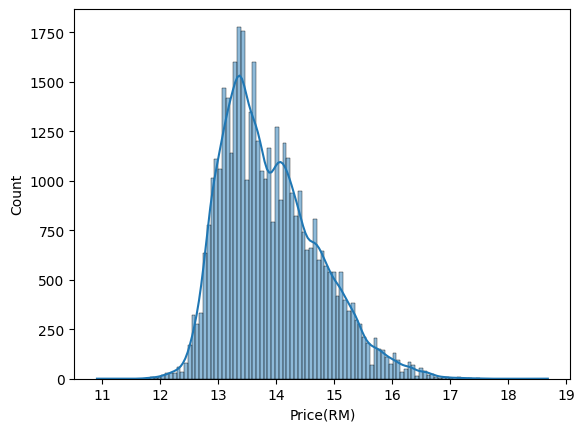

In [ ]:
sns.histplot(np.log(df_f['Price(RM)']),kde=True )

In [ ]:
df_f.columns

Index(['Location_KL', 'Price(RM)', 'Rooms', 'Bathrooms', 'Property Type',
       'Size_sqft', 'Furnishing', 'Price_per_square'],
      dtype='object')

In [ ]:
dummies=pd.get_dummies(df_f['Location_KL'])

In [ ]:
dummies.columns

Index(['Ampang', 'Ampang Hilir', 'Bandar Damai Perdana', 'Bandar Menjalara',
       'Bangsar', 'Bangsar South', 'Batu Caves', 'Brickfields',
       'Bukit Bintang', 'Bukit Jalil', 'Bukit Tunku (Kenny Hills)', 'Cheras',
       'City Centre', 'Country Heights Damansara', 'Damansara Heights',
       'Desa Pandan', 'Desa ParkCity', 'Desa Petaling', 'Dutamas',
       'Jalan Ipoh', 'Jalan Klang Lama (Old Klang Road)', 'Jalan Kuching',
       'Jalan Sultan Ismail', 'KL City', 'KL Eco City', 'KL Sentral', 'KLCC',
       'Kepong', 'Keramat', 'Kuchai Lama', 'Mont Kiara', 'OUG', 'Other',
       'Pandan Perdana', 'Pantai', 'Salak Selatan', 'Segambut', 'Sentul',
       'Seputeh', 'Setapak', 'Setiawangsa', 'Sri Hartamas', 'Sri Petaling',
       'Sungai Besi', 'Sunway SPK', 'Taman Desa', 'Taman Melawati',
       'Taman Tun Dr Ismail', 'Titiwangsa', 'Wangsa Maju'],
      dtype='object')

In [ ]:
final=pd.concat([df_f,dummies.drop('Other', axis='columns')],axis='columns')

In [ ]:
X=final.drop(['Price(RM)','Price_per_square','Property Type','Furnishing','Location_KL'], axis='columns')

In [ ]:
X

,Rooms,Bathrooms,Size_sqft,Ampang,Ampang Hilir,Bandar Damai Perdana,Bandar Menjalara,Bangsar,Bangsar South,Batu Caves,...,Setiawangsa,Sri Hartamas,Sri Petaling,Sungai Besi,Sunway SPK,Taman Desa,Taman Melawati,Taman Tun Dr Ismail,Titiwangsa,Wangsa Maju
0,7,8,6300.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,4,9670.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,6,4640.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,1876.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,1572.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41844,3,2,1150.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41845,3,2,1150.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41846,3,2,1150.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41847,6,4,2040.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y=final['Price(RM)']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train,X_test,y_train,y_test =train_test_split (X,y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_test,y_test)  #digunakan untuk melihat sejauh data yang diprediksi mendekati nilai yang sebenarnya

0.8161299672994631

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.79754383, 0.87204382, 0.79508619, 0.82065953, 0.8159416 ])

In [ ]:
#menguji analisis mana yang memberikan nilai terbaik

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def find_best_gridsearch(X, y):
    algos = {
        'LinearRegression': {
            'model': LinearRegression(),
            'params': {'fit_intercept': [True, False]}
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'Decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],  # Corrected the parameter name
                'splitter': ['best', 'random']  # Corrected the parameter name
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [ ]:
find_best_gridsearch(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,LinearRegression,0.820255,{'fit_intercept': True}
1,Lasso,0.820255,"{'alpha': 2, 'selection': 'cyclic'}"
2,Decision_tree,0.833986,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [ ]:
def predict_price(Location, Rooms, Bathrom, Sqft):
  loc_index=np.where(X.columns ==Location)[0][0]

  x   = np.zeros(len(X.columns))
  x[0]=Rooms
  x[1]=Bathrom
  x[2]=Sqft

  if loc_index>=0:
    x[loc_index]=1
    return lr.predict([x])[0]


In [ ]:
predict_price('Ampang',3,3,450).round(2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


365793.16

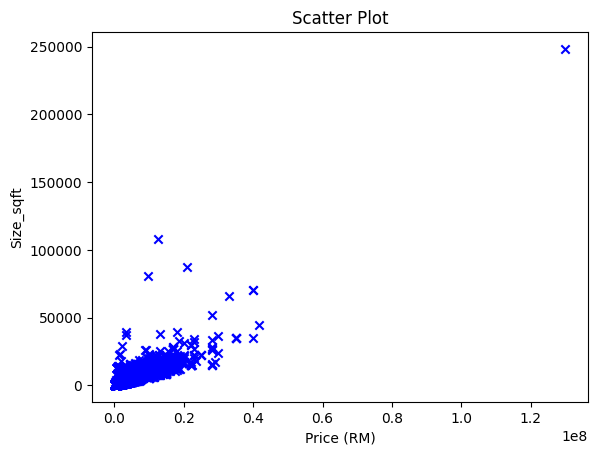

In [ ]:


fig, ax = plt.subplots()  # Create a figure and a set of subplots

ax.scatter(final['Price(RM)'], final['Size_sqft'], c='blue', marker='x')  # Scatter plot
ax.set_xlabel('Price (RM)')  # Set x-axis label
ax.set_ylabel('Size_sqft')   # Set y-axis label
ax.set_title('Scatter Plot')  # Set title

plt.show()  # Display the plot


In [ ]:
lr.predict(X_test)

array([3006047.32871727,  208600.03252235, 2466423.0090551 , ...,
        805789.34284576, 1638876.78345463, 1795119.08187551])

In [ ]:
lr.score(X_test, y_test)

0.8161299672994631